# Collision Analysis

### DATA EXPLORATION

 Importing all the required libraries

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

#from mlxtend.evaluate import feature_importance_permutation

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sn

Read the csv to a data frame

In [3]:
df1=pd.read_csv(r"C:\Users\ShubhobrotoDey\Downloads\IBM COURSERA\C9_Capstone\Data-Collisions.csv")

Take a peek into the data and its shape

In [152]:
df1.head(3)

,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Injury Collision,Angles,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",UNKOWN,N,Overcast,Wet,Daylight,UNKOWN
1,1,Property Damage Only Collision,Sideswipe,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",UNKOWN,0,Raining,Wet,Dark - Street Lights On,UNKOWN
2,1,Property Damage Only Collision,Parked Car,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",UNKOWN,0,Overcast,Dry,Daylight,UNKOWN


In [48]:
df1.shape

(194673, 38)

In [33]:
b=df1['COLLISIONTYPE'].value_counts().index
b

Index(['Parked Car', 'Angles', 'Rear Ended', 'Other', 'Sideswipe', 'Left Turn',
       'Pedestrian', 'Cycles', 'Right Turn', 'Head On'],
      dtype='object')

In [34]:
print(f"DataFrame:\n{b}\n")
#print(f"column types:\n{df1.dtypes}")

DataFrame:
Index(['Parked Car', 'Angles', 'Rear Ended', 'Other', 'Sideswipe', 'Left Turn',
       'Pedestrian', 'Cycles', 'Right Turn', 'Head On'],
      dtype='object')



In [45]:

from collections import Counter 
  
# declaring the list 
col_one_list = df1['COLLISIONTYPE'].tolist()
  
# driver program 
x = ['Pedestrian','Rear Ended']
for i in [x]:
    d = Counter(col_one_list) 
    print(d)


Counter({'Parked Car': 47987, 'Angles': 34674, 'Rear Ended': 34090, 'Other': 23703, 'Sideswipe': 18609, 'Left Turn': 13703, 'Pedestrian': 6608, 'Cycles': 5415, nan: 4904, 'Right Turn': 2956, 'Head On': 2024})


## DATA CLEANING

In [47]:
# filling all na with UNKNOWN string, so we can encode later
df1.fillna('UNKOWN', inplace=True)

In [49]:
# dropping the unecessary columns that does not make sense
df1.drop(['SEVERITYCODE','X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS',
         'ADDRTYPE','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','INCDATE',
         'INCDTTM','ST_COLCODE','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLDESC','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT'], axis=1, inplace=True)

In [50]:
df1.head(5)

,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Injury Collision,Angles,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",UNKOWN,N,Overcast,Wet,Daylight,UNKOWN
1,1,Property Damage Only Collision,Sideswipe,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",UNKOWN,0,Raining,Wet,Dark - Street Lights On,UNKOWN
2,1,Property Damage Only Collision,Parked Car,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",UNKOWN,0,Overcast,Dry,Daylight,UNKOWN
3,1,Property Damage Only Collision,Other,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",UNKOWN,N,Clear,Dry,Daylight,UNKOWN
4,2,Injury Collision,Angles,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",UNKOWN,0,Raining,Wet,Daylight,UNKOWN



## DATA PREPROCESSING: OneHotEncoding

One hot encoding is a process by which categorical 
variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Since our target column is a categorical variable, we implent onehot encoding to build a decision tree.


In [52]:
ohe = OneHotEncoder(handle_unknown='ignore')


Building the target datframe


In [55]:
# Creating a new dataframe for COLLISION_TYPE
# Then we will OneHotEncode the data to categories
COLLISION_type1 = df1['COLLISIONTYPE']
COLLISION_df1 = pd.DataFrame(COLLISION_type1, columns=['COLLISIONTYPE'])
COLLISION_df1 = pd.DataFrame(ohe.fit_transform(COLLISION_df1[['COLLISIONTYPE']]).toarray())

In [56]:
# Each column will be a COLLISION_TYPE, so we will need to label each column
COLLISION_col1 = df1['COLLISIONTYPE'].unique()
COLLISION_df1.columns = COLLISION_col1

In [57]:
COLLISION_df1.columns

Index(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles', 'Rear Ended',
       'Head On', 'UNKOWN', 'Left Turn', 'Pedestrian', 'Right Turn'],
      dtype='object')


Building the Features (label encoded) dataframe

In [58]:
# Here we select the features we want to use and LabelEncode them using a for loop
# We will also create a new dataframe for them
text_col = ['WEATHER', 'LIGHTCOND', 'JUNCTIONTYPE', 'UNDERINFL', 'ROADCOND', 'INATTENTIONIND', 'SPEEDING']
en_df1 = pd.DataFrame()
for col in text_col:
    encoder = LabelEncoder()
    en_df1[col] = encoder.fit_transform(df1[col])
    
en_df1

,WEATHER,LIGHTCOND,JUNCTIONTYPE,UNDERINFL,ROADCOND,INATTENTIONIND,SPEEDING
0,4,5,1,2,9,0,0
1,6,2,4,0,9,0,0
2,4,5,4,0,0,0,0
3,1,5,4,2,0,0,0
4,6,5,1,0,9,0,0
...,...,...,...,...,...,...,...
194668,1,5,4,2,0,0,0
194669,6,5,4,2,9,1,0
194670,1,5,1,2,0,0,0
194671,1,6,1,2,0,0,0


Building the severity dataframe

In [59]:
sev_en_df = ['SEVERITYCODE.1','SEVERITYDESC']
sev_en_df = pd.DataFrame(df[sev_en_df])
sev_en_df

,SEVERITYCODE.1,SEVERITYDESC
0,2,Injury Collision
1,1,Property Damage Only Collision
2,1,Property Damage Only Collision
3,1,Property Damage Only Collision
4,2,Injury Collision
...,...,...
194668,2,Injury Collision
194669,1,Property Damage Only Collision
194670,2,Injury Collision
194671,2,Injury Collision


In [96]:
sev_df1 = pd.DataFrame()
for col in sev_en_df:
    encoder = LabelEncoder()
    sev_df1[col] = encoder.fit_transform(df1[col])
    
sev_df1

,SEVERITYCODE.1,SEVERITYDESC
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
194668,1,0
194669,0,1
194670,1,0
194671,1,0


 Merging the label encoded feature set with the target set

In [102]:
# Merge the FIRST_CRASH_TYPE and the LabelEncoded dataframe together
df_01 = pd.merge(COLLISION_df1, en_df1, left_index=True, right_index=True)

In [103]:
df_01.columns

Index(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles', 'Rear Ended',
       'Head On', 'UNKOWN', 'Left Turn', 'Pedestrian', 'Right Turn', 'WEATHER',
       'LIGHTCOND', 'JUNCTIONTYPE', 'UNDERINFL', 'ROADCOND', 'INATTENTIONIND',
       'SPEEDING'],
      dtype='object')

## Model Selection : Decision Tree Approach

Define Features and Target

In [153]:
# Defining our Features and Target
# For X, we want to remove all of the other CRASH types and keep the features.
y = df_01['Rear Ended']
X = df_01.drop(columns=['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles', 'Rear Ended',
       'Head On', 'UNKOWN', 'Left Turn', 'Pedestrian', 'Right Turn'], axis=1)

In [154]:
X.columns

Index(['WEATHER', 'LIGHTCOND', 'JUNCTIONTYPE', 'UNDERINFL', 'ROADCOND',
       'INATTENTIONIND', 'SPEEDING'],
      dtype='object')

In [155]:
# Train and Test on a basic model (test size to 20%)
dt_model = DecisionTreeClassifier(criterion="gini", random_state=1,max_depth=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [156]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [157]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)


## Model Evaluation : ROC_AUC test

AUC stands for "Area under the ROC Curve." i.e, AUC measures the entire two-dimensional area underneath the entire ROC curve. AUC provides an aggregate measure of performance across all possible classification thresholds.

Evaluation using ROC_AUC test
#criterion="entropy", random_state=1,max_depth=5
#Accuracy Score Train: 0.8086786782930306
#Accuracy Score Test: 0.8098369076666239
#ROC_AUC Test: 0.629644421001453

In [158]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')

Accuracy Score Train: 0.8086786782930306
Accuracy Score Test: 0.8098369076666239
ROC_AUC Test: 0.629644421001453


### Confusion Matrix

In [175]:
from sklearn.metrics import classification_report, confusion_matrix
threshold = 0.1
y_test_pred = y_train_pred >= threshold
print(classification_report(y_train, y_test_pred))
pd.DataFrame(confusion_matrix(y_train, y_test_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89    117348
         1.0       0.86      0.27      0.41     38390

    accuracy                           0.81    155738
   macro avg       0.83      0.63      0.65    155738
weighted avg       0.82      0.81      0.77    155738



,Predicted Negative,Predicted Positive
Actual Negative,115690,1658
Actual Positive,28138,10252


Area under the Receiver Operating Characteristic curve: 0.6264598974490002


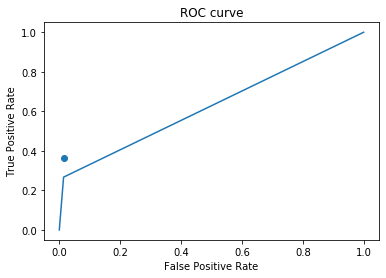

In [177]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_test_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_train, y_test_pred))
    
# When threshold = 0.1
false_positives = 1658
true_positives = 10252
actual_negative=115690
actual_positive=28138
false_positive_rate = false_positives/actual_negative
true_positive_rate = true_positives/actual_positive
plt.scatter(false_positive_rate, true_positive_rate)


### Feature Analysis

In [178]:
# Lets look at which feature is the most important
dt_model.feature_importances_

array([7.74554443e-02, 2.34555424e-01, 6.84525321e-01, 0.00000000e+00,
       1.08657169e-03, 6.69229010e-04, 1.70800961e-03])

In [179]:
# LIGHTING_CONDITION, JUNCTION TYPE
# seems to be the most important
X

,WEATHER,LIGHTCOND,JUNCTIONTYPE,UNDERINFL,ROADCOND,INATTENTIONIND,SPEEDING
0,4,5,1,2,9,0,0
1,6,2,4,0,9,0,0
2,4,5,4,0,0,0,0
3,1,5,4,2,0,0,0
4,6,5,1,0,9,0,0
...,...,...,...,...,...,...,...
194668,1,5,4,2,0,0,0
194669,6,5,4,2,9,1,0
194670,1,5,1,2,0,0,0
194671,1,6,1,2,0,0,0


Feature ranking:
1. feature 2 (0.684525)
2. feature 1 (0.234555)
3. feature 0 (0.077455)
4. feature 6 (0.001708)
5. feature 4 (0.001087)
6. feature 5 (0.000669)
7. feature 3 (0.000000)


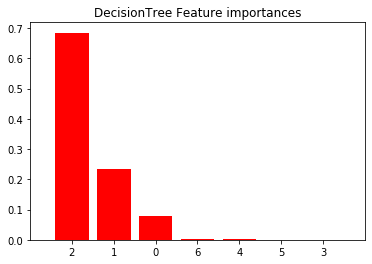

In [180]:
# Here we graph out which feature is the most imporant.

importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("DecisionTree Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

We have determined the causal factors for rear end collisions. Nowe we try to visualise the decision tree, as how each of the factors contribute to a rear end collision.

### Building the Decision Tree

In [125]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [126]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\ShubhobrotoDey\anaconda3\Library\bin\graphviz'

In [134]:
import graphviz


# This plot tree helper function can plot the DecisionTreeClassifier 
# We can check what feature our model is splitting on and what are the requirements
def plot_tree(dt_model, used_cols, out_file='mytree.png'):
    export_graphviz(dt_model, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)



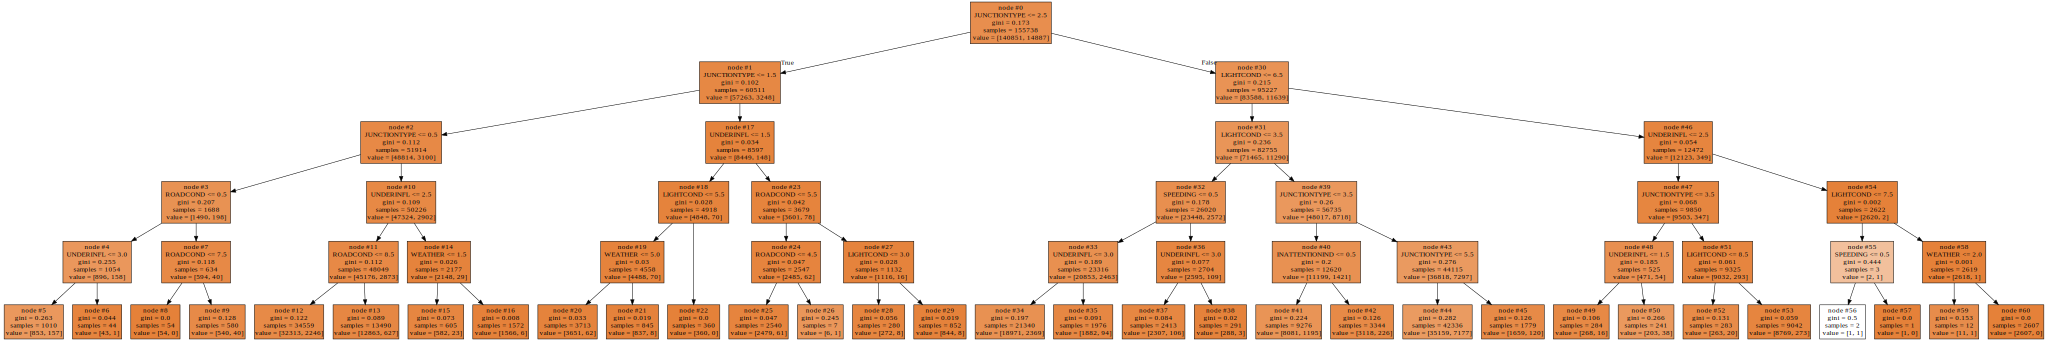

In [135]:
# Since we have a lot of data, lets only set max_depth=5
# This will speed up the process to graph
dt_model2 = DecisionTreeClassifier(random_state=1, max_depth=5)
dt_model2.fit(X_train, y_train)
plot_tree(dt_model2, X.columns.tolist())

In [139]:
# Feature 2
df1['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
UNKOWN                                                6329
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [140]:
df1.head(3)

,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Injury Collision,Angles,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",UNKOWN,N,Overcast,Wet,Daylight,UNKOWN
1,1,Property Damage Only Collision,Sideswipe,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",UNKOWN,0,Raining,Wet,Dark - Street Lights On,UNKOWN
2,1,Property Damage Only Collision,Parked Car,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",UNKOWN,0,Overcast,Dry,Daylight,UNKOWN


In [147]:
# Selecting the columns with only "Rear Ended crashes
rear_end = df1[df1['COLLISIONTYPE'] == 'Rear Ended']
rear_end.JUNCTIONTYPE.value_counts().index

Index(['Mid-Block (not related to intersection)',
       'Mid-Block (but intersection related)',
       'At Intersection (intersection related)',
       'At Intersection (but not related to intersection)',
       'Driveway Junction', 'UNKOWN', 'Ramp Junction'],
      dtype='object')

### Visualizing the Impact of each major feature on rear End Type Crashes. Here are the top 3 reasons.

Junction Type : Category of junction at which collision took place 

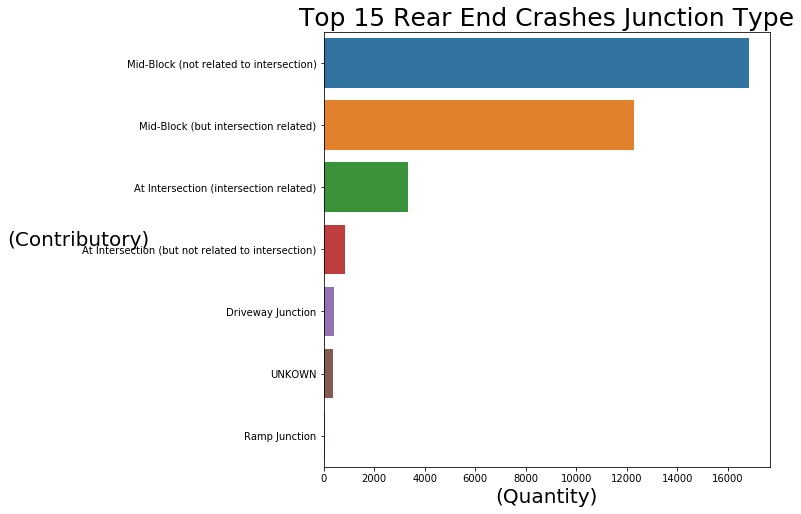

In [148]:
# Bar graph of top 15 Junction Types

plt.figure(figsize=(8,8))

y= rear_end.JUNCTIONTYPE.value_counts().values[:15]
x=rear_end.JUNCTIONTYPE.value_counts().index[:15]

sn.barplot(y, x)
plt.title('Top 15 Rear End Crashes Junction Type', size=25)
plt.ylabel("(Contributory)", size=20, rotation=0)
plt.xlabel("(Quantity)", size=20)
plt.xticks(size=10)
plt.yticks(size=10);

In [151]:
# Selecting the columns with only "Rear Ended" crashes
rear_end = df1[df1['COLLISIONTYPE'] == 'Rear Ended']
rear_end.LIGHTCOND.value_counts().index

Index(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Unknown', 'Dawn',
       'Dark - No Street Lights', 'Dark - Street Lights Off', 'Other',
       'UNKOWN', 'Dark - Unknown Lighting'],
      dtype='object')

LightCond : The light conditions during the collision.

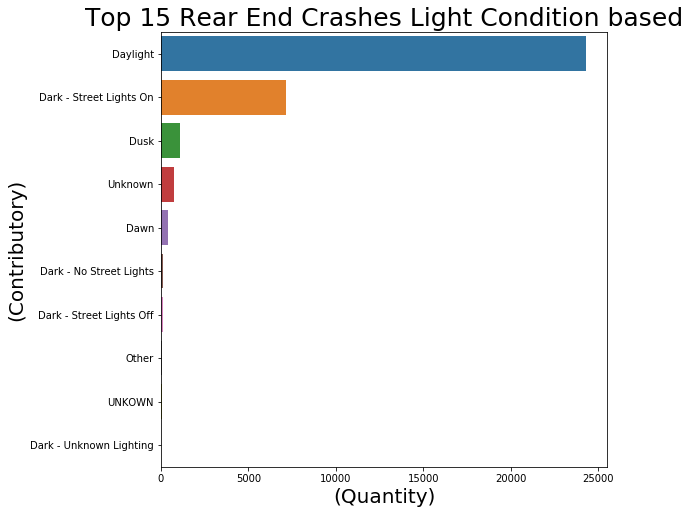

In [186]:
# Bar graph of top 15 Light conditions

plt.figure(figsize=(8,8))

y= rear_end.LIGHTCOND.value_counts().values[:15]
x=rear_end.LIGHTCOND.value_counts().index[:15]

sn.barplot(y, x)
plt.title('Top 15 Rear End Crashes Light Condition based', size=25)
plt.ylabel("(Contributory)", size=20, rotation=90)
plt.xlabel("(Quantity)", size=20)
plt.xticks(size=10)
plt.yticks(size=10);

In [184]:
# Selecting the columns with only "Rear Ended" crashes
rear_end = df1[df1['COLLISIONTYPE'] == 'Rear Ended']
rear_end.WEATHER.value_counts().index

Index(['Clear', 'Raining', 'Overcast', 'Unknown', 'Fog/Smog/Smoke', 'Snowing',
       'Other', 'UNKOWN', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind'],
      dtype='object')

Weather : A description of the weather conditions during the time of the collision.

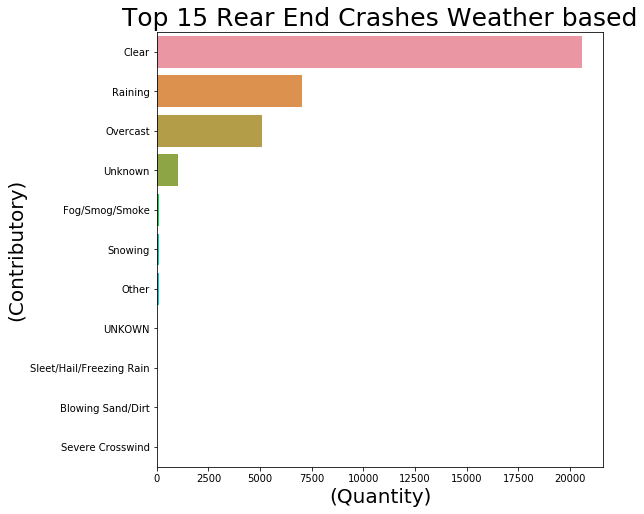

In [185]:
# Bar graph of top 15 Weather conditions

plt.figure(figsize=(8,8))

y= rear_end.WEATHER.value_counts().values[:15]
x=rear_end.WEATHER.value_counts().index[:15]

sn.barplot(y, x)
plt.title('Top 15 Rear End Crashes Weather based', size=25)
plt.ylabel("(Contributory)", size=20, rotation=90)
plt.xlabel("(Quantity)", size=20)
plt.xticks(size=10)
plt.yticks(size=10);